<a href="https://colab.research.google.com/github/RfZafar/RFleo/blob/master/Linear_regression_univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [ ]:
#Importing the training Dataset: House Pricing Linear univariate Regression
train_data = pandas.read_csv(r'/content/House Pricing/train.csv')
#Taking 1-variable i.e., LotArea, also their sale prices
x_train = train_data[['LotArea']]
y_train = train_data[['SalePrice']]
#converting data-frame to list to array:
x1 = np.array(x_train.values.tolist())
y1 = np.array(y_train.values.tolist())
# Rescale the data
x = x1/(max(x1)-min(x1))
y = y1/(max(y1)-min(y1))

In [ ]:
# Gradint descent & Cost minimization function:
def gradient_descent(x,y,alpha,tol,imax):
    # size of data set
    m = y.size
    # Define initial values
    theta_0 = np.array([0.0])   # theta_0 initial guess
    theta_1 = np.array([0.0])   # theta_1 initial guess
    cost = np.array([0.0])      # cost function
    slope= np.array([0.0])      # All theta_0 values
    intercept = np.array([0.0]) # All theta_1 values 
    
    # Begin gradient descent algorithm
    convergence = False
    inum = 0
    # While loop continues until convergence = True
    while not convergence:
        #Cost function:
        temp_cost = (1/2*m)*sum([(theta_0 + theta_1 * x[i] - y[i])**2 for i in range(m)])
        cost = np.append(cost, temp_cost)
        # Calculate gradients for theta_0 and theta_1
        grad_0 = (1/m) * sum([(theta_0 + theta_1 * x[i] - y[i]) for i in range(m)])
        grad_1 = (1/m) * sum([(theta_0 + theta_1 * x[i] - y[i]) * x[i] for i in range(m)])
        
        # Update theta_0 and theta_1
        temp0 = theta_0 - alpha * grad_0
        temp1 = theta_1 - alpha * grad_1
        theta0_new = temp0
        theta1_new = temp1

        # Check convergence, and stop loop if correct conditions are met
        if abs(theta0_new - theta_0) <= tol and abs(theta1_new - theta_1) <= tol:
            print('We have convergence at iteration', inum, '!')
            convergence = True
            
        # Update theta_0 and theta_1 for next iteration
        theta_0 = theta0_new
        theta_1 = theta1_new
        intercept = np.append(intercept, theta_0)
        slope = np.append(slope, theta_1)
        
        # Increment itertion counter
        inum = inum + 1
        
        # Check iteration number, and stop loop if inum == imax
        if inum == imax:
            print('Maximum number of iterations reached. We have convergence!')
            convrgence = True
            
    # Show result   
    print('Slope=', theta_1)
    print('Intercept=', theta_0)
    print('Iteration of convergece=', inum)
    return cost, intercept, slope

In [ ]:
# Define input parameters:
alpha = 1e-02
tol = 1e-05
imax = 10000
# Function call
cost, intercept, slope = gradient_descent(x, y, alpha, tol, imax)
#Deleting zero-th entery:
cost = np.delete(cost,0,0)
slope = np.delete(slope,0,0)
intercept = np.delete(intercept,0,0)    

Maximum number of iterations reached. We have convergence!
We have convergence at iteration 13038 !
Slope= [0.16305254]
Intercept= [0.24327868]
Iteration of convergece= 13039


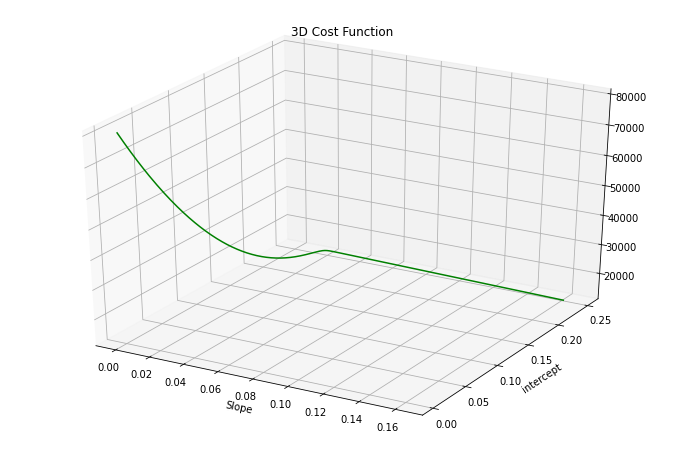

In [62]:
# plotting
fig,ax = plt.subplots(figsize=(12,8))
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
# ax.scatter(slope, intercept, cost, 'green')
ax.plot3D(slope, intercept, cost, 'green')
ax.set_title('3D Cost Function')
ax.set_ylabel('intercept')
ax.set_xlabel('Slope')
plt.show()  

In [36]:
#Import Test Data:
test_data = pandas.read_csv(r'/content/House Pricing/test.csv')
#Taking 1-variable i.e., LotArea, also their sale prices
y_test = test_data[['LotArea']]
#converting data-frame to list to array:
y1_test = np.array(y_test.values.tolist())
y1_rescaled = y1_test/(max(y1_test)-min(y1_test))

In [ ]:
#Predicting 'SalePrice' of houses from Best Parameters of Hypothesis:
y_pred = np.array([0.0])
for i in range(len(y1_rescaled)):
  y_current = 0.24327868 + 0.16305254*y1_rescaled[i]
  #Rescaling the LotArea:
  y_current = y_current*(max(y1_rescaled)-min(y1_rescaled))
  y_pred = np.append(y_pred,y_current)

y_pred = np.delete(y_pred,0,0)
y_pred.reshape((len(y_pred),1))

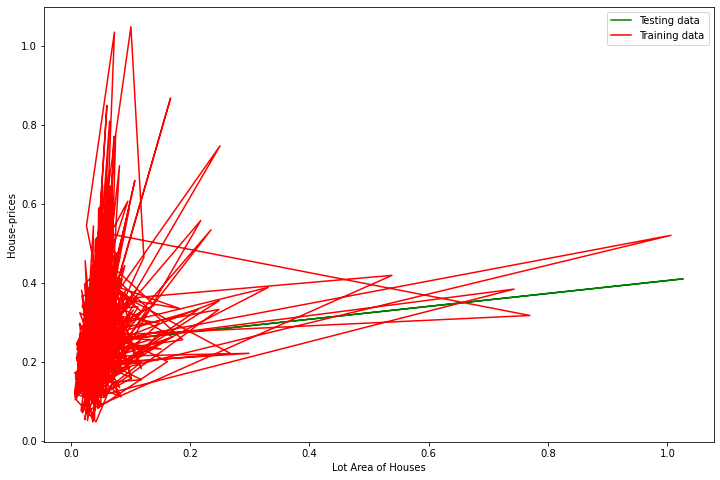

In [61]:
# Plotting: Visualizing the model prediction vs origonal data
fig,ax = plt.subplots(figsize=(12,8))
plt.plot(y1_rescaled,y_pred,'g',label='Testing data')
plt.plot(x,y,'r',label='Training data')
#plt.ylim(np.min(y_pred,y1),np.max(y_pred,y1))
#plt.xlim(np.min(y1_rescaled,x1[1:]),np.max(y1_rescaled,x1[1:]))
plt.xlabel('Lot Area of Houses')
plt.ylabel('House-prices')
plt.legend()
plt.show()